In [1]:
from utils import load_mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def select_random_k(K):
    centroids = np.empty([K, np.shape(X)[1]])
    idx = np.random.choice(np.shape(X)[0], K, replace=False)
    for j, i in enumerate(idx):
        centroids[j] =X[i]
    return centroids

In [3]:
def find_closest_k(example, Kmap):
    distances = np.empty(K)
    j = 0
    for y in range(Kmap.shape[0]):
        for x in range(Kmap.shape[1]):
            distances[j] = np.linalg.norm(Kmap[y, x] - example)
            j += 1
    index_centroid = np.argmin(distances)
    
    closest_x = int(index_centroid % size_map[1])
    closest_y = int(index_centroid / size_map[1])
    return closest_y, closest_x

In [4]:
def update_kmap(Kmap, closest_y, closest_x, example):
    for y in range(Kmap.shape[0]):
        for x in range(Kmap.shape[1]):
            Kmap[y, x] = Kmap[y, x] + lr * (np.exp(- np.linalg.norm(np.array([y, x]) - np.array([closest_y, closest_x]) ) / 2 * gamma)) * (example - Kmap[y, x])
    return Kmap

In [5]:
def fit(epochs, Kmap, X):
    for i in range(epochs) :
        if i % 1000 == 0:
            print(i)
        idx = np.random.choice(np.shape(X)[0], 1, replace=False)
        example = X[idx]
        closest_y, closest_x = find_closest_k(example, Kmap)
        Kmap = update_kmap(Kmap, closest_y, closest_x, example)
    return Kmap

In [6]:
def display_grid(Kmap):
    f, fig = plt.subplots(size_map[0], size_map[1])
    columns =size_map[1]
    for y in range(Kmap.shape[0]):
        for i, x in enumerate(range(Kmap.shape[1])):
            fig[y, x].imshow(np.reshape(Kmap[y, x], (28,28)), cmap='gray')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


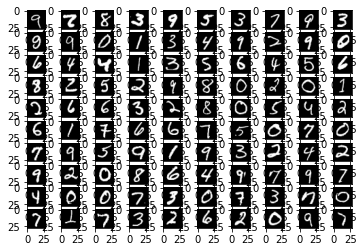

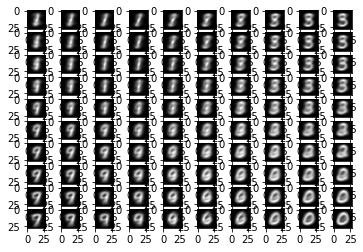

In [7]:
X, Y = load_mnist()
size_map = (10, 10)
K = size_map[0] * size_map[1]
gamma = 1
lr = 1e-2
epochs = 10000

W = select_random_k(K)
Kmap = np.reshape(W, (size_map[0], size_map[1], X.shape[1]))
display_grid(Kmap)
fit(epochs, Kmap, X)
display_grid(Kmap)
